In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from causal_nh.utils import open_pkl_file

%matplotlib inline

In [20]:
dataset_name = 'synth_3_events'

In [21]:
# path = f'../../data/NeuralHawkesData/data_bookorder/fold1/'
path = f'../../data/data_{dataset_name}/'

In [22]:
train = open_pkl_file(path + 'train.pkl', 'train')
dev = open_pkl_file(path + 'dev.pkl', 'dev')

In [23]:
from causal_nh.train_cuda import train_nh, train_causal_nh, train_causal_nh_v2

In [7]:
train_nh(train, dev, '../../artefacts/', False, lr=0.01, num_epochs=100, batch_size=10)

Processing data...
start training...
You are using GPU acceleration.
Number of GPU:  6
Epoch 0, process 0 out of 9 is done
Epoch 0, process 1 out of 9 is done
Epoch 0, process 2 out of 9 is done
Epoch 0, process 3 out of 9 is done
Epoch 0, process 4 out of 9 is done
Epoch 0, process 5 out of 9 is done
Epoch 0, process 6 out of 9 is done
Epoch 0, process 7 out of 9 is done
Epoch 0, process 8 out of 9 is done
The log-likelihood at epoch 0: -1.010819725513138

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Epoch 1, process 0 out of 9 is done


KeyboardInterrupt: 

In [24]:
import pickle

In [25]:
with open(path + 'A.pkl', 'rb') as f:
    A = pickle.load(f)

In [26]:
A = A['A']
A[A==0.2] = 1


In [27]:
A

array([[1., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.]])

Processing data...
You are using GPU acceleration.
Number of GPU:  6
start training...
tensor([[1., 1., 0.],
        [1., 1., 0.],
        [0., 0., 1.]], device='cuda:0')
The log-likelihood at epoch 0: -1.1875452537357287

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 1: -1.0121523660489422

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 2: -0.9503193667625084

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 3: -0.8686800862575554

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 4: -0.8425642537462223

validating on log likelihood...

validating on type prediction accuracy if we know when next event will h

The log-likelihood at epoch 48: -0.7376481895882303

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 49: -0.7371285914414036

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 50: -0.7381178446629449

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 51: -0.7367276367843352

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 52: -0.7389190325407152

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 53: -0.735614230922599

validating on log likelihood...

validating on type prediction accuracy if we know when next event will

The log-likelihood at epoch 97: -0.7356198056581599

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 98: -0.7347870057505037

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 99: -0.7355962933911182

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 100: -0.7357076897246474

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 101: -0.7368980597296844

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 102: -0.7346447188234554

validating on log likelihood...

validating on type prediction accuracy if we know when next event 


validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 146: -0.7328742811870382

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 147: -0.7331043210103257

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 148: -0.7307864771344023

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 149: -0.7324024290106615

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 150: -0.7326533576960208

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 151: -0.734268752098724

validating on

The log-likelihood at epoch 194: -0.72912412378274

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 195: -0.7286565018468771

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 196: -0.7281170641999665

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 197: -0.7283298551355776

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 198: -0.7318762723514104

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 199: -0.732781642199043

validating on log likelihood...

validating on type prediction accuracy if we know when next event 


validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 243: -0.7215153311786434

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 244: -0.7225009772183513

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 245: -0.7210448890824379

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 246: -0.719179516978677

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 247: -0.7196590098220282

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 248: -0.7206933856090497

validating on

The log-likelihood at epoch 291: -0.7123966050516286

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 292: -0.7130860030851243

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 293: -0.7072290547347213

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 294: -0.7083940760892378

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 295: -0.7083902393594694

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 296: -0.7137601197846709

validating on log likelihood...

validating on type prediction accuracy if we know when next eve


validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 340: -0.6940142096730189

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 341: -0.701627953953996

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 342: -0.7021249252329583

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 343: -0.6991660523526696

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 344: -0.6983133145672431

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 345: -0.6937292423081767

validating on

The log-likelihood at epoch 388: -0.6670258982538616

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 389: -0.6675847490975487

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 390: -0.6637716299739759

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 391: -0.6657386262277535

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 392: -0.6710294765782404

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 393: -0.6817402160111652

validating on log likelihood...

validating on type prediction accuracy if we know when next eve


validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 437: -0.6508563777598221

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 438: -0.642744186534587

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 439: -0.638076558827233

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 440: -0.6416552111316319

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 441: -0.6419741515908328

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 442: -0.6426253790820181

validating on 

The log-likelihood at epoch 485: -0.6231797504617193

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 486: -0.6198491902860561

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 487: -0.6305837535153627

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 488: -0.6173625139040464

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 489: -0.6191207363110729

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 490: -0.6148416512760242

validating on log likelihood...

validating on type prediction accuracy if we know when next eve

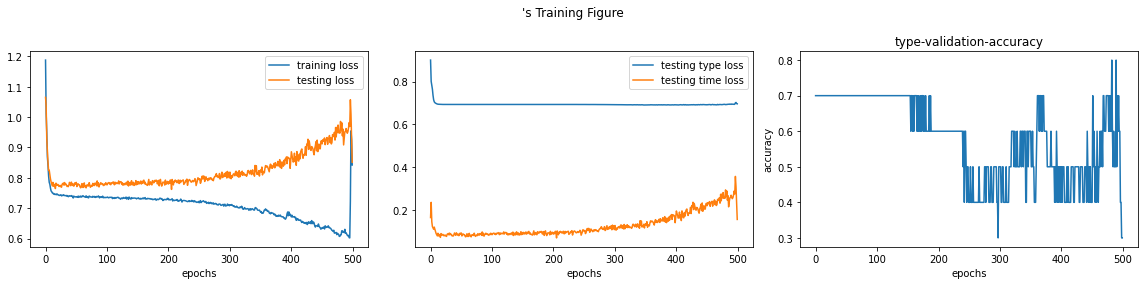

Saving training loss and validation data...
If you have a trained model before this, please combine the previous train_date file to generate plots that are able to show the whole training information


In [29]:
train_causal_nh(train, dev, A,  '../../artefacts/', False, lr=0.01, num_epochs=500, batch_size=50, dataset_name=dataset_name)

In [30]:
train_causal_nh_v2(train, dev, A,  '../../artefacts/', False, lr=0.01, num_epochs=100, batch_size=50)

Processing data...
You are using GPU acceleration.
Number of GPU:  6
start training...


RuntimeError: t() expects a tensor with <= 2 dimensions, but self is 3D